In [1]:
f=open('./day17/input.txt','r')
lines = f.readlines()
f.close()

In [155]:
from collections import defaultdict
grid = defaultdict(list)
glist = []
for l in lines:
    s = []
    for c in l:#.replace('\n',''):
        if c == '#':
            s.append(1)
        elif c == '.':
            s.append(0)
    glist.append(s)
    
grid[0] = glist

In [156]:
glist

[[0, 1, 1, 1, 0, 1, 1, 1],
 [0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 1, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 1, 1, 1, 0, 0, 0],
 [0, 1, 1, 1, 1, 0, 0, 0]]

In [16]:
import numpy as np
#(x,y,z)
cyclecount = 7
space = np.zeros((8+2*cyclecount+1,8+2*cyclecount+1,1+2*cyclecount))
space.shape

(23, 23, 15)

In [22]:
offset = 11
offz = 7
space[offset:offset+8,offset:offset+8,offz] = np.asarray(grid[0])

In [10]:
len('.###.###'),len(lines)

(8, 8)

During a cycle, all cubes simultaneously change their state according to the following rules:

If a cube is active and exactly 2 or 3 of its neighbors are also active, the cube remains active. Otherwise, the cube becomes inactive.
If a cube is inactive but exactly 3 of its neighbors are active, the cube becomes active. Otherwise, the cube remains inactive.


In [44]:
space = np.zeros((8+2*cyclecount+1,8+2*cyclecount+1,1+2*cyclecount))
space[offset:offset+8,offset:offset+8,offz] = np.asarray(grid[0])



In [46]:
grid[0]

[[0, 1, 1, 1, 0, 1, 1, 1],
 [0, 1, 0, 1, 0, 0, 0, 1],
 [0, 0, 1, 1, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 1, 0, 1],
 [0, 0, 1, 1, 1, 0, 0, 0],
 [0, 1, 1, 1, 1, 0, 0, 0]]

In [ ]:
.#.
..#
###

In [61]:
grid[0] = [[0, 1,0],[0,0,1],[1,1,1]]

In [62]:
space = np.zeros((8+2*cyclecount+1,8+2*cyclecount+1,1+2*cyclecount))

space.shape

(21, 21, 13)

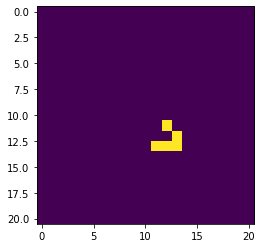

In [64]:
import matplotlib.pyplot as plt
#space[offset-4:offset+4,offset-4:offset+4,offz] = np.asarray(grid[0])
space[offset:offset+3,offset:offset+3,offz] = np.asarray(grid[0])



plt.imshow(space[:,:,offz])

In [ ]:
plt.figure()
    plt.imshow(space[:,:,offz])
    plt.figure()
    plt.imshow(newspace[:,:,offz])

In [138]:
grid[0] = [[0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0,0],
 [1, 1, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

In [145]:
def neighbour_count(x,y,z,space):
    total = 0
    for zz in range(-1,2):
        for yy in range(-1,2):
            for xx in range(-1,2):
                if xx==0 and yy==0 and yy==0:
                    continue
                elif space[x+xx,y+yy,z+zz] == 1:
                    total+=1
    return total

offset = 11
offz = 7
cyclecount = 10

space = np.zeros((8+2*cyclecount+1,8+2*cyclecount+1,1+2*cyclecount))
space[offset-4:offset+4,offset-4:offset+4,offz] = np.asarray(grid[0])
#space[offset:offset+3,offset:offset+3,offz] = np.asarray(grid[0])

for t in range(0,1):
    print('t=',t)
    newspace = np.zeros((8+2*cyclecount+1,8+2*cyclecount+1,1+2*cyclecount))
    for k in range(1,20):
        for j in range(1,24):
            for i in range(1,24):
                nc = neighbour_count(i,j,k,space)
                if space[i,j,k] == 1 and (nc==2 or nc ==3) :
                    newspace[i,j,k] = 1
                elif (space[i,j,k] == 0) and (nc ==3):
                    newspace[i,j,k] = 1
                    print(i,j,k)

    space = newspace.copy()
    print(space.sum())
space.sum()

t= 0
8 7 6
9 8 6
10 8 6
8 9 6
8 7 7
10 8 7
8 7 8
9 8 8
10 8 8
8 9 8
13.0


13.0

In [144]:
space = np.zeros((8+2*cyclecount+1,8+2*cyclecount+1,1+2*cyclecount))
space[offset-4:offset+4,offset-4:offset+4,offz] = np.asarray(grid[0])

neighbour_count(8,8,offz-1,space)

5

In [151]:
space[0:11,0:11,offz-1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

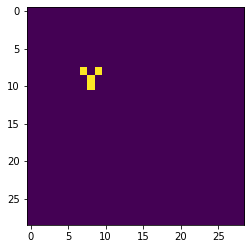

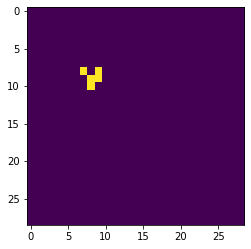

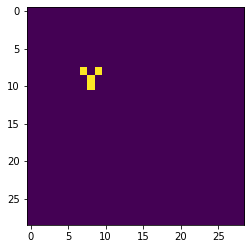

In [140]:
plt.imshow(space[:,:,offz-1])
plt.figure()
plt.imshow(space[:,:,offz])
plt.figure()
plt.imshow(space[:,:,offz+1])

In [100]:
space.shape

(21, 21, 13)

In [192]:
from collections import Counter

f=open('./day17/input.txt','r')
lines = f.readlines()
f.close()

n=3
def calc(n=3):
    neighbors = [()]
    for x in range(n):
        neighbors = [x + (i,) for i in [-1, 0, 1] for x in neighbors]
    neighbors.remove(n * (0,))

    g = (0,)*(n-2)
    state = set()
    for j,l in enumerate(lines):
        s = []
        for i,c in enumerate(l):
            if c == '#':
                state.add(g+(i,j))

    for i in range(6):
        #some mental shit stolen from reddit
        state = set(pos for pos, cnt in Counter(tuple(map(sum, zip(pos, n))) for pos in state for n in neighbors).items() if cnt == 3 or pos in state and cnt == 2)

    print(len(state))

calc(3)
calc(4)

384
2012
